In [6]:
# Importamos librerías de análisis de datos
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.

In [8]:
#Creamos el dataframe a partir del set de datos y les asigno un tipo acorde a las descripciones
df = pd.read_csv('data/train.csv', dtype={'titulo':'object','descripcion':'object',\
                                           'tipodepropiedad':'category', 'direccion':'object',\
                                           'ciudad':'category', 'provincia':'category',\
                                           'antiguedad':'float', 'habitaciones':'float',\
                                           'garages':'float','banos':'float',\
                                           'metroscubiertos':'float', 'metrostotales':'float',\
                                           'idzona':'float', 'lat':'float', 'lng':'float',\
                                           'gimnasio':'bool', 'usosmultiples':'bool',\
                                           'piscina':'bool', 'escuelascercanas':'bool',\
                                           'centroscomercialescercanos':'bool',\
                                           'precio':'float'}, parse_dates=['fecha'])
df.dtypes

id                                     int64
titulo                                object
descripcion                           object
tipodepropiedad                     category
direccion                             object
ciudad                              category
provincia                           category
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                                bool
usosmultiples                           bool
piscina                                 bool
escuelascercanas                        bool
centroscomercialescercanos              bool
precio    

In [9]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls

,nulls,porcentaje
id,0,0.00
escuelascercanas,0,0.00
piscina,0,0.00
usosmultiples,0,0.00
gimnasio,0,0.00
fecha,0,0.00
centroscomercialescercanos,0,0.00
precio,0,0.00
tipodepropiedad,46,0.02
provincia,155,0.06


Vamosa a empezar con el analisis de casas

Empezamos con la distribucion por año de casas

In [10]:
casas = df.loc[df['tipodepropiedad'] == 'Casa']

In [11]:
casas['precio_m2'] = casas['precio']/casas['metroscubiertos']
casas['anio'] = casas['fecha'].dt.year
casas['anio'].value_counts()

2016    54524
2015    29800
2014    24299
2013    19366
2012    13728
Name: anio, dtype: int64

In [12]:
casas = casas.loc[casas['precio_m2'] < 20000]

Filtre las casas que superaban el percentil 75 por mas que la desviacion standard
Esto lo hice por la irregularidad en la variable metros totales (hay muchos casos donde metros totales es menor a metros cubiertos lo cual no tiene sentido

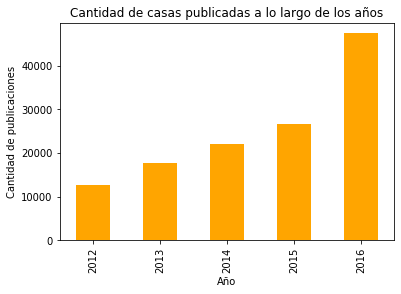

In [13]:
casas.groupby('anio').agg({'id':'count'}).plot(kind='bar',title = 'Cantidad de casas publicadas a lo largo de los años',legend = False, color = 'orange')
plt.xlabel('Año')
plt.ylabel('Cantidad de publicaciones')
plt.savefig('CantCasasPublicadas.png',bbox_inches= 'tight')

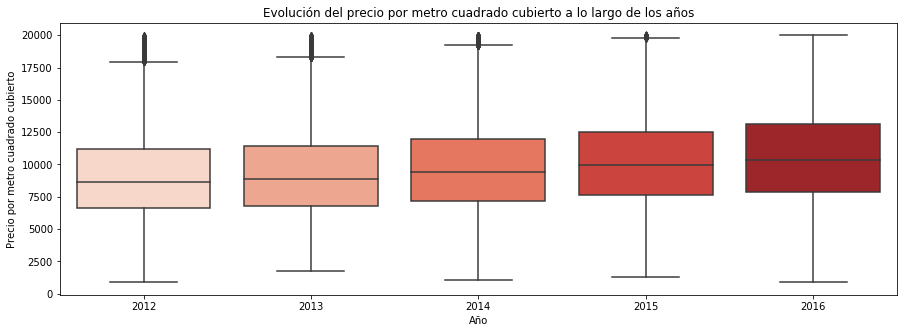

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(x=casas['anio'], y ='precio_m2', data=casas, palette='Reds')
plt.title('Evolución del precio por metro cuadrado cubierto a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Precio por metro cuadrado cubierto')
plt.savefig('EvolucionPrecioMetroCuadradoCasas.png',bbox_inches='tight')

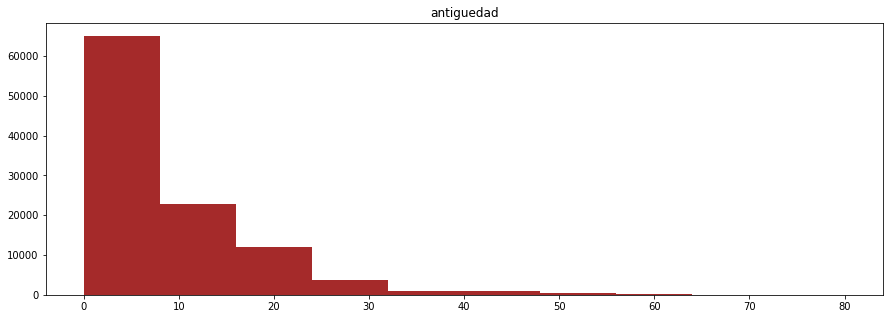

In [41]:
casas.hist(column='antiguedad',figsize=(15,5),color= 'brown',grid=False,xlabelsize=10)
plt.savefig('HistAntiguedadCasas.png',bbox_inches='tight')


In [16]:
casas.loc[casas['ciudad'] == 'Huehuetoca'].head(400)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,precio_m2,anio
845,77052,casa de 3 recamras 2 niveles a 3 min de la uni...,<p>hermosa casa de dos niveles tres recamaras ...,Casa,AV JALAPA HUEHUETOCA ESTADO DE MEXICO,Huehuetoca,Edo. de México,0.0,3.0,1.0,...,NaN,2013-08-28,False,False,False,True,True,341000.0,5683.333333,2013
2152,118360,casas amplias con subcidio,preciosa casa en el centro de huehuetoca con t...,Casa,av bicentenario esq. jorobas huehuetoca centro,Huehuetoca,Edo. de México,0.0,2.0,1.0,...,NaN,2015-03-04,True,False,False,True,True,405000.0,7105.263158,2015
2510,74754,"casas tipo duplex en urbivilla del rey, hueh...","bonitas casas en remate, tipo duplex en buenas...",Casa,URBIVILLA DEL REY NO. 12,Huehuetoca,Edo. de México,5.0,2.0,1.0,...,NaN,2015-05-19,False,False,False,False,False,315000.0,7500.000000,2015
4243,140340,casa 2 niveles misiones huehuetoca,casa sola residencial \nárea construida: 54 m2...,Casa,"Conjunto habitacional Hacienda las Misiones, H...",Huehuetoca,Edo. de México,5.0,2.0,1.0,...,NaN,2016-02-03,False,False,False,True,False,550000.0,10185.185185,2016
5182,293466,"venta de casa en citara, huehuetoca",bonita casa amueblada y nunca habitada de dos ...,Casa,Citara,Huehuetoca,Edo. de México,10.0,2.0,1.0,...,NaN,2016-12-14,False,False,False,False,False,435000.0,7250.000000,2016
5877,239477,excelente desarrollo en huehuetoca ven he invi...,"venta de viviendas en excelente desarrollo, de...",Casa,"Av. Prolongación Jalapa, esquina con Av. Guada...",Huehuetoca,Edo. de México,0.0,3.0,1.0,...,NaN,2014-10-03,False,False,False,True,True,355000.0,6454.545455,2014
6048,171492,casas nuevas 3 recamaras,<p>venta de casas nuevas<br /><br />areas depo...,Casa,Sta. Teresa 4 av. Jalpa Col. Barrio la Cañada s/n,Huehuetoca,Edo. de México,0.0,3.0,1.0,...,-99.242385,2012-10-16,False,False,False,True,True,330000.0,6111.111111,2012
6229,138561,casa en venta huehuetoca estado de mexico,"conjunto con caseta de vigilancia, acceso cont...",Casa,"El Dorado, Huehuetoca, Estado de México",Huehuetoca,Edo. de México,0.0,2.0,1.0,...,-99.215394,2015-03-11,False,False,False,True,True,375000.0,7812.500000,2015
6375,126754,oferta casas solas 2 recamaras a 25 min de cua...,oferta fraccionamiento ubicado a 25 min de cua...,Casa,HUEHUETOCA CENTRO,Huehuetoca,Edo. de México,0.0,2.0,1.0,...,NaN,2014-09-23,False,False,False,True,True,400000.0,6557.377049,2014
7946,39846,citara huehuetoca,"casa con 2 baños, 3 recamaras, espacio para es...",Casa,"Estado de Mexico, Huehuetoca, Fraccionamiento ...",Huehuetoca,Edo. de México,5.0,3.0,1.0,...,NaN,2016-08-24,False,False,False,False,False,600000.0,8823.529412,2016


In [17]:
cant_publicaciones_por_ciudad = casas.groupby('ciudad').agg({'id':'count'})
filtro_ciudades = cant_publicaciones_por_ciudad.loc[cant_publicaciones_por_ciudad['id'] > 200]
filtro_ciudades = filtro_ciudades.merge(casas,on='ciudad',how='left')

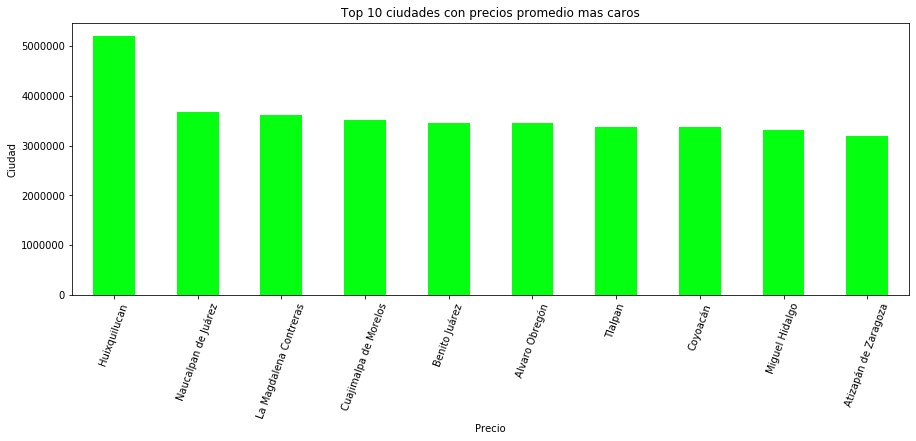

In [54]:
top_10_ciudades_caras = filtro_ciudades.groupby('ciudad').agg({'precio':'mean'}).sort_values('precio',ascending=False).head(10)
top_10_ciudades_caras.plot(kind='bar',figsize=(15,5),rot=70,legend=False,color= '#05FF11',title = 'Top 10 ciudades con precios promedio mas caros')
plt.xlabel('Precio')
plt.ylabel('Ciudad')

plt.savefig('Top10CiudadesCarasCasas.png',bbox_inches='tight')

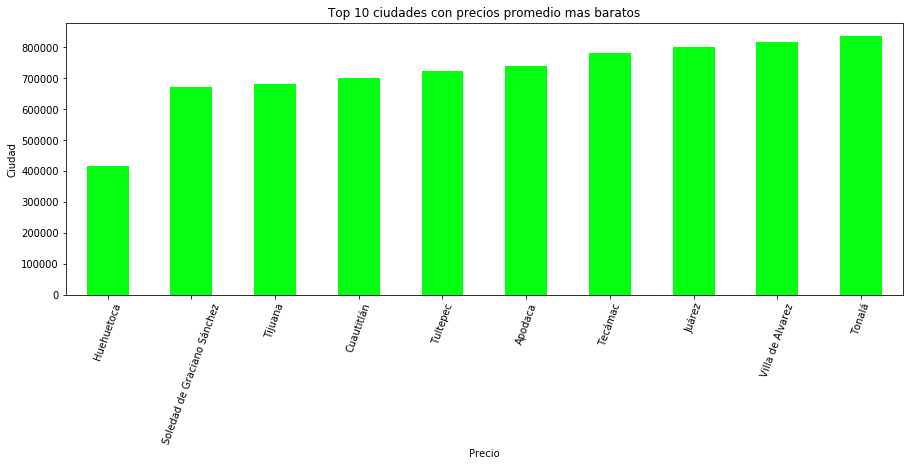

In [56]:
top_10_ciudades_baratas = filtro_ciudades.groupby('ciudad').agg({'precio':'mean'}).sort_values('precio',ascending=True).head(10)
top_10_ciudades_baratas.plot(kind='bar',figsize=(15,5),rot=70,legend=False,color= '#05FF11',title = 'Top 10 ciudades con precios promedio mas baratos')
plt.xlabel('Precio')
plt.ylabel('Ciudad')

plt.savefig('Top10CiudadesBaratasCasas.png',bbox_inches='tight')

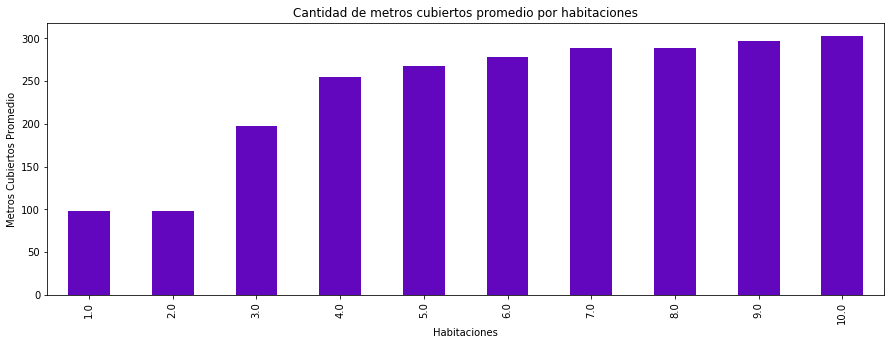

In [40]:
casas.groupby('habitaciones').agg({'metroscubiertos' : 'mean'})\
    .plot(kind='bar',figsize=(15,5),color = '#6307BE',legend=False, title='Cantidad de metros cubiertos promedio por habitaciones')
plt.ylabel('Metros Cubiertos Promedio')
plt.xlabel('Habitaciones')

plt.savefig('CantMetrosCubiertosPorHabitacionCasas.png',box_inches='tight')

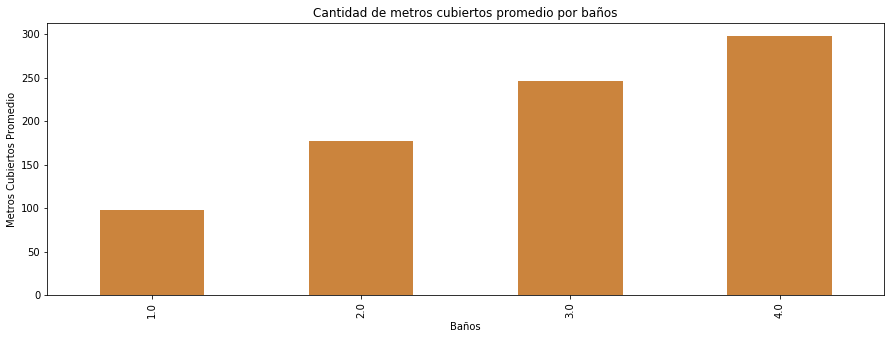

In [46]:
casas.groupby('banos').agg({'metroscubiertos' : 'mean'})\
    .plot(kind='bar',title='Cantidad de metros cubiertos promedio por baños',legend=False,figsize=(15,5),color= '#CB843D')
plt.ylabel('Metros Cubiertos Promedio')
plt.xlabel('Baños')
plt.savefig('CantMetrosCubiertosPorBanoCasas.png',bbox_inches='tight')

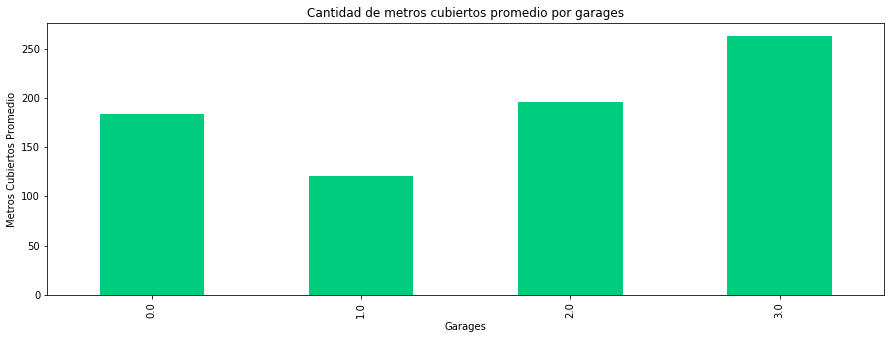

In [48]:
casas.groupby('garages').agg({'metroscubiertos' : 'mean'})\
    .plot(kind='bar',title='Cantidad de metros cubiertos promedio por garages',legend=False,figsize=(15,5),color='#00CC7D')
plt.ylabel('Metros Cubiertos Promedio')
plt.xlabel('Garages')
plt.savefig('CantMetrosCubiertosPorGarageCasas.png',bbox_inches='tight')

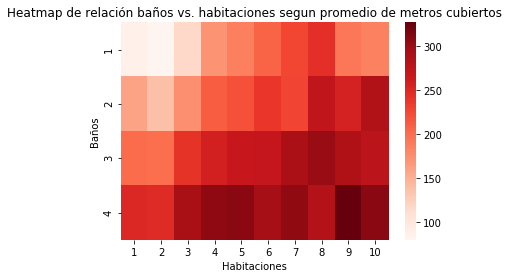

In [57]:
xticks = ['1','2','3','4','5','6','7','8','9','10']
yticks = ['1','2','3','4']
casas_banos_habitaciones = casas.groupby(['banos','habitaciones']).agg({'metroscubiertos' : 'mean'})
casas_banos_habitaciones = casas_banos_habitaciones.unstack()
heatmap_public = sns.heatmap(casas_banos_habitaciones,yticklabels = yticks,xticklabels= xticks,fmt="", cmap='Reds');
plt.xlabel('Habitaciones')
plt.ylabel('Baños')
plt.title('Heatmap de relación baños vs. habitaciones segun promedio de metros cubiertos')

plt.savefig('RelacionBanosHabitacionesMetrosCubiertosCasas.png',bbox_inches='tight')